# Derivative of a simple function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x): return 3*x**2 + 3*x + 1

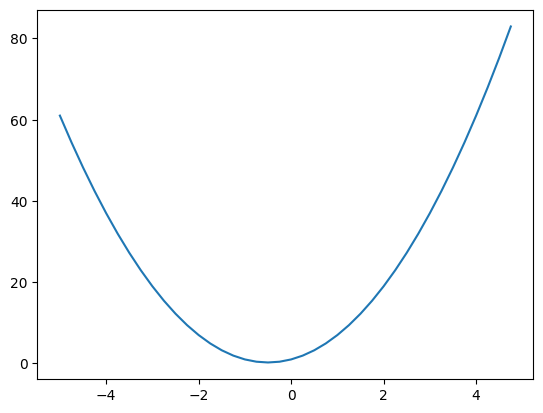

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

plt.plot(xs, ys)

In [4]:
# derivative
h = 0.000001
x = 2
(f(x + h) - f(x)) / h

15.00000300325155

In [5]:
# les get more complex

a = 2
b = -3
c = 5
h = 0.000001

d1 = a * b + c
a += h
d2 = a * b + c
(d2 - d1) / h


-3.000000000419334

In [13]:
import math

class Value():
    def __init__(self, data, label='', _children=[], _op="", grad = 0):
        self.data = data
        self.label = label
        self._children = set(_children)
        self._op = _op
        self.grad = grad
    def __repr__(self):
        return f"Value({self.label}={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, _children=[self, other], _op="+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, _children=[self, other], _op="*")
    
    def tanh(self):
        tanh = math.tanh(self.data)
        return Value(tanh, _children=[self, ], _op="tanh")

In [28]:
a = Value(2.0, 'a')
b = Value(3.0, 'b')
c = a * b; c.label = 'c'
o = c.tanh(); o.label = 'o'

In [29]:
# plot graph
import graphviz

def trace(root):
    nodes, edges = set(), set()
    def build(root):
        if root not in nodes:
            nodes.add(root)
        for v in root._children:
            edges.add((v, root))
            build(v)
    build(root)
    return nodes, edges

def draw_graph(root):
    f = graphviz.Digraph(format='svg', graph_attr={'rankdir':"LR"})
    nodes, edges = trace(root)
    for v in nodes:
        f.node(str(id(v)), label="{%s|data %s|grad %s}" %(v.label, v.data, v.grad) , shape='record')
        if v._op:
            f.node(f'{str(id(v))}_{v._op}', label=f"{v._op}")
            f.edge(f'{str(id(v))}_{v._op}', str(id(v)))
    for v1, v2 in edges:
        f.edge(str(id(v1)), f'{str(id(v2))}_{v2._op}')
    return f

In [31]:
a = Value(2.0, 'a')
b = Value(-3.0, 'b')
c = Value(10.0, 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2, 'f')
L = d * f; L.label = 'L'

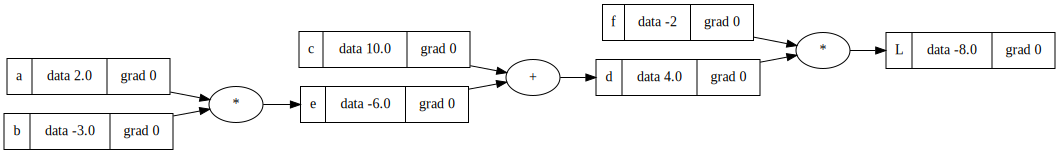

In [32]:
draw_graph(L)

In [33]:
L.grad = 1.
f.grad = 4.
d.grad = -2.
e.grad = -2.
c.grad = -2.
a.grad = 6
b.grad = -4

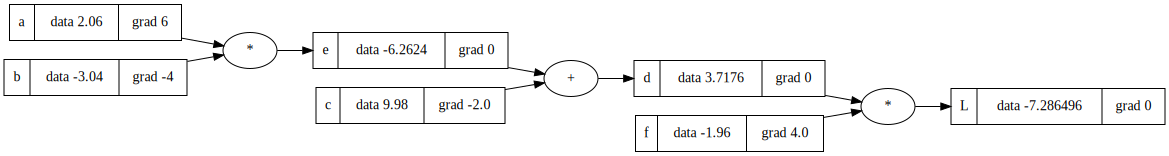

In [34]:
# adjust value base on grad to increase L
alpha = 0.01
a.data += a.grad * alpha
b.data += b.grad * alpha
c.data += c.grad * alpha
f.data += f.grad * alpha

e = a * b; e.label = 'e'
d = e + c; d.label = 'd'

L = d * f; L.label = 'L'
draw_graph(L)

In [35]:
def lol():
    h = 0.0001
    
    a = Value(2.0, 'a')
    b = Value(-3.0, 'b')
    c = Value(10.0, 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2, 'f')
    L1 = d * f
    
    a = Value(2.0, 'a')
    b = Value(-3.0, 'b'); b.data += h
    c = Value(10.0, 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2, 'f');
    L2 = d * f
    
    print( (L2.data - L1.data) / h)
    
lol()

-4.000000000008441


### Convert this file to md

In [15]:
from IPython.core.display import Javascript

In [18]:
%%js
IPython.notebook.kernel.execute('this_notebook = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [19]:
this_notebook

'2022-11-16-derivative-of-a-simple-function.ipynb'

In [20]:
!jupyter nbconvert --to markdown {this_notebook} --output-dir=../_posts

[NbConvertApp] Converting notebook 2022-11-16-derivative-of-a-simple-function.ipynb to markdown
[NbConvertApp] Support files will be in 2022-11-16-derivative-of-a-simple-function_files/
[NbConvertApp] Making directory ../_posts/2022-11-16-derivative-of-a-simple-function_files
[NbConvertApp] Making directory ../_posts/2022-11-16-derivative-of-a-simple-function_files
[NbConvertApp] Writing 3584 bytes to ../_posts/2022-11-16-derivative-of-a-simple-function.md
